In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
vgs = pd.read_csv('top100videogamesales.csv')
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data.
This stacked bar chart shows all regional sales, shown in different colors, grouped by specific publishers. Nintendo seems to be the most frequent publisher.

<Axes: title={'center': 'Total sales for each Publisher by Region'}, xlabel='Publisher', ylabel='Total Sales'>

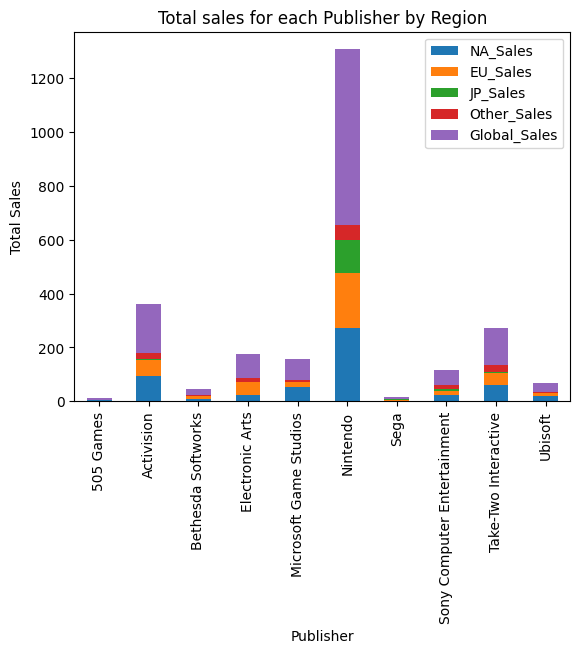

In [71]:
grouped_by_publisher = vgs.groupby('Publisher').sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
grouped_by_publisher.plot.bar(stacked=True, title='Total sales for each Publisher by Region', ylabel='Total Sales')


## Global Sales by Year: Create a line chart to show the total global sales for each year.
The year 2006 had the most total global sales and the year 2009 had the second most global sales.

<Axes: title={'center': 'Total Global Sales for each year'}, xlabel='Years', ylabel='Total Global Sales'>

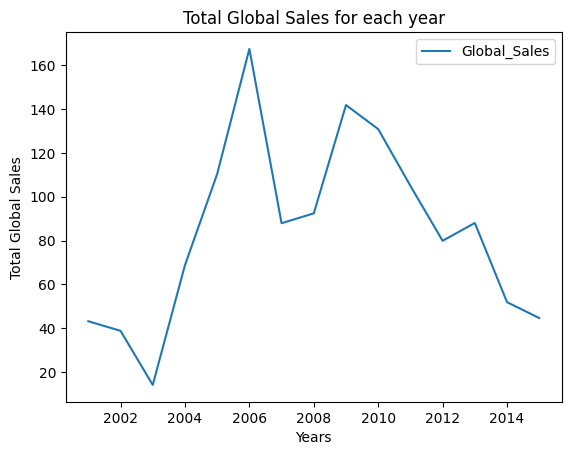

In [72]:
grouped_by_year = vgs.groupby('Year').sum()
grouped_by_year.plot.line(title='Total Global Sales for each year', ylabel='Total Global Sales', y='Global_Sales', xlabel='Years')


## Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre.
In this histogram, the Global Sales of games with the genre Action range from about 6.5 to about 21.



array([[<Axes: title={'center': 'Global_Sales'}>]], dtype=object)

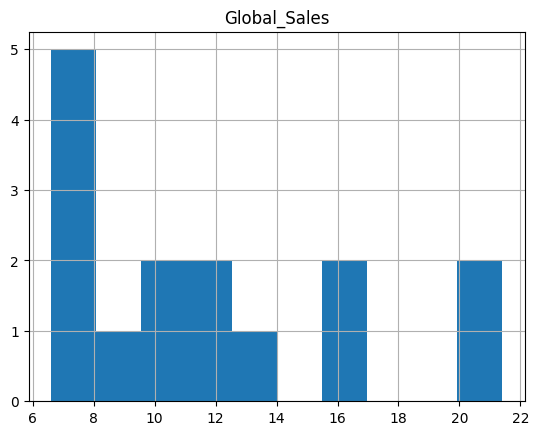

In [129]:
grouped_by_genre = vgs[vgs['Genre'] == 'Action']
grouped_by_genre = vgs.sort_values(by=['Genre', 'Global_Sales']).head(15)
grouped_by_genre.hist(column='Global_Sales')

In [130]:
print(vgs.sort_values(by=['Genre', 'Global_Sales']).head(15))

    Rank                                    Name     Platform  Year   Genre  \
96    97                     Red Dead Redemption  PlayStation  2010  Action   
92    93              Uncharted 2: Among Thieves  PlayStation  2009  Action   
89    90          Uncharted 3: Drake's Deception  PlayStation  2011  Action   
76    77  The Legend of Zelda: Twilight Princess     Nintendo  2006  Action   
69    70  Grand Theft Auto: Liberty City Stories  PlayStation  2005  Action   
64    65                          FIFA Soccer 13  PlayStation  2012  Action   
44    45                     Grand Theft Auto IV  PlayStation  2008  Action   
40    41                     Grand Theft Auto IV         XBox  2008  Action   
36    37    Pokemon HeartGold/Pokemon SoulSilver     Nintendo  2009  Action   
35    36                      Grand Theft Auto V  PlayStation  2014  Action   
29    30                    Grand Theft Auto III  PlayStation  2001  Action   
16    17             Grand Theft Auto: Vice City  Pl

## North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) 
In this pie chart the Shooter type games are the most sold in North America. Included in the 'Other' portion of the pie chart are puzzle, fighting, and simulation type games. With each falling below 3%.

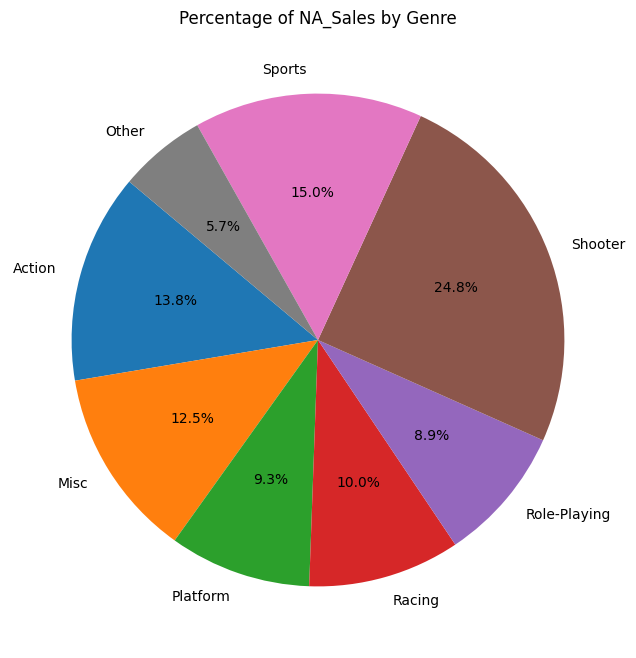

In [112]:
genre_na_sales = vgs.groupby('Genre')['NA_Sales'].sum()
total_na_sales = genre_na_sales.sum()
genre_percentage = (genre_na_sales / total_na_sales) * 100
threshold = 3
main_genres = genre_percentage[genre_percentage >= threshold]
other_genre = genre_percentage[genre_percentage < threshold].sum()
main_genres['Other'] = other_genre
plt.figure(figsize=(8, 8))
plt.pie(main_genres, labels=main_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of NA_Sales by Genre')
plt.axis=('equal')
plt.show()

## European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
In this pie chart Sports are the number one selling genres followed very closely by Shooter type games in Europe. Inlcuded in the 'Other' portion of this chart are genres of puzzle and fighting. These two genres made up less than 3% of the European sales.

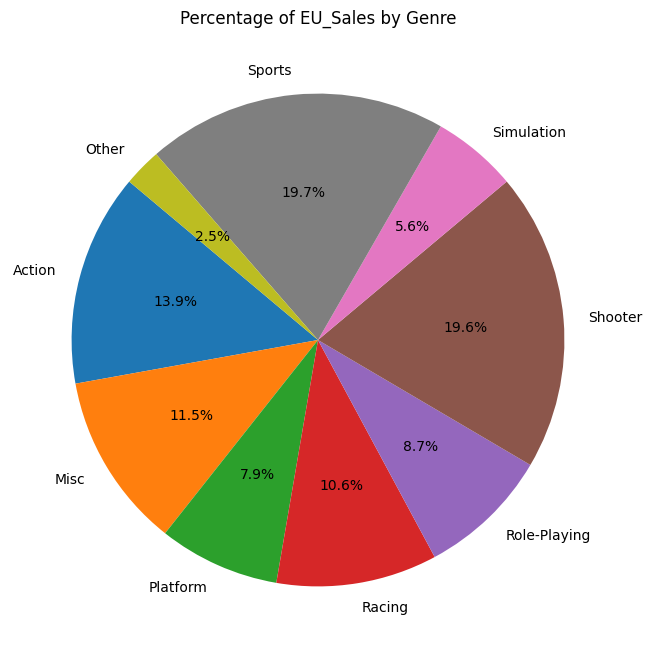

In [106]:
genre_eu_sales = vgs.groupby('Genre')['EU_Sales'].sum()
total_eu_sales = genre_eu_sales.sum()
genre_percent = (genre_eu_sales / total_eu_sales) * 100
threshold = 3
main_genres = genre_percent[genre_percent >= threshold]
other_genre = genre_percent[genre_percent < threshold].sum()
main_genres['Other'] = other_genre
plt.figure(figsize=(8, 8))
plt.pie(main_genres, labels=main_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of EU_Sales by Genre')
plt.axis=('equal')
plt.show()

## Explain differences and similarities between the North American and European charts in markdown.
Some similarities of North American and European sales were that they had the same top 5 best selling genres. In North America the top selling genre was Shooter type games and in Europe the top selling genre was Sport type games. The genre Simulation in Europe was much higher than in North America. There was also a bigger difference in percentages of Shooter type games and Sport type games in North America than in Europe.

## Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset.
In the bar chart below Nintendo created the most games followed by PlayStation.

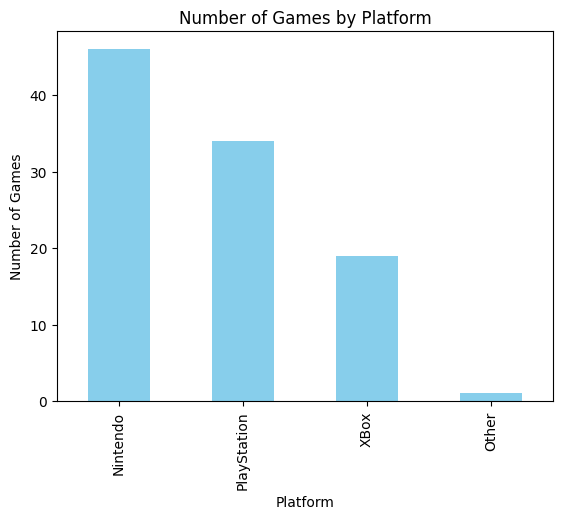

In [98]:
platform_counts = vgs['Platform'].value_counts()
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()

## What genre of game is present the most in the top 100 games from 2000-2015?
In this bar chart the game genre of Shooter has the highest number of games at 25 followed by Action type games at 15.

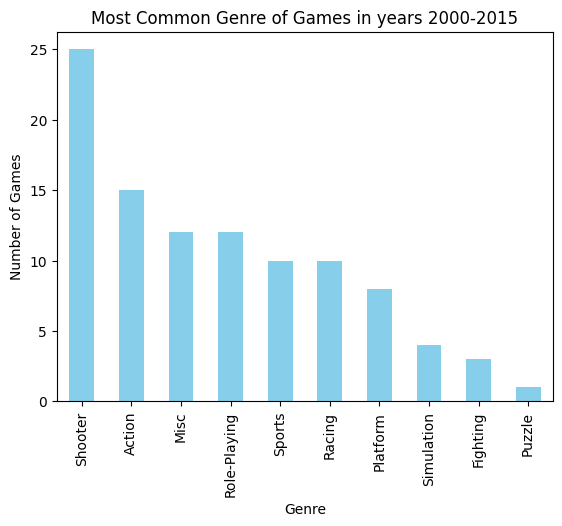

In [99]:
years_filtered = vgs[(vgs['Year'] >= 2000) & (vgs['Year'] <= 2015)]
most_common_genre = years_filtered['Genre'].value_counts().idxmax()
genre_counts = years_filtered['Genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Genre of Games in years 2000-2015')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

## What percentage of global sales does Playstation have in the dataset?
In this pie chart PlayStation makes up 27.1% of all Global Sales which was far less than Ninendo making up 55.5% of the total of Global Sales.

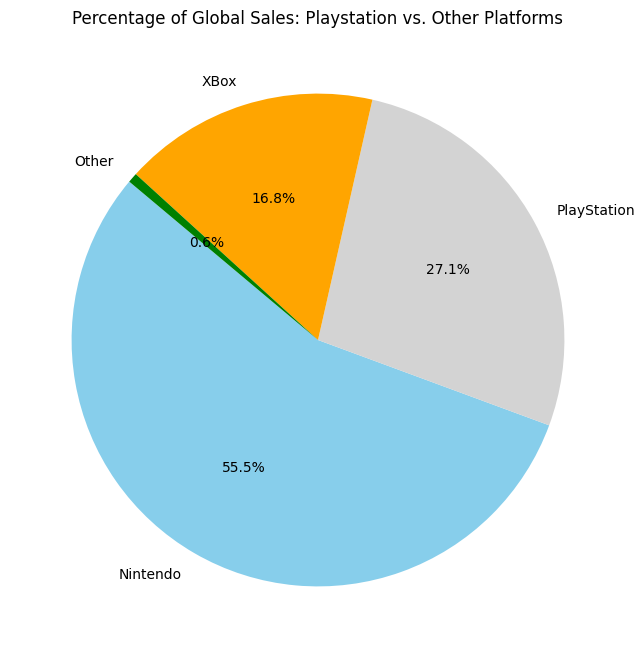

In [124]:
playstation_sales = vgs.groupby('Platform')['Global_Sales'].sum()
total_global_sales = playstation_sales.sum()
playstation_percent = (playstation_sales / total_global_sales) * 100
colors = ['skyblue', 'lightgray', 'orange', 'green']
threshold = 3
main_platforms = playstation_percent[playstation_percent >= threshold]
other_platforms = playstation_percent[playstation_percent < threshold].sum()
main_platforms['Other'] = other_platforms
plt.figure(figsize=(8, 8))
plt.pie(main_platforms, labels=main_platforms.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Global Sales: Playstation vs. Other Platforms')
plt.axis=('equal')
plt.show()

## What is the distribution of sales for Shooter games?

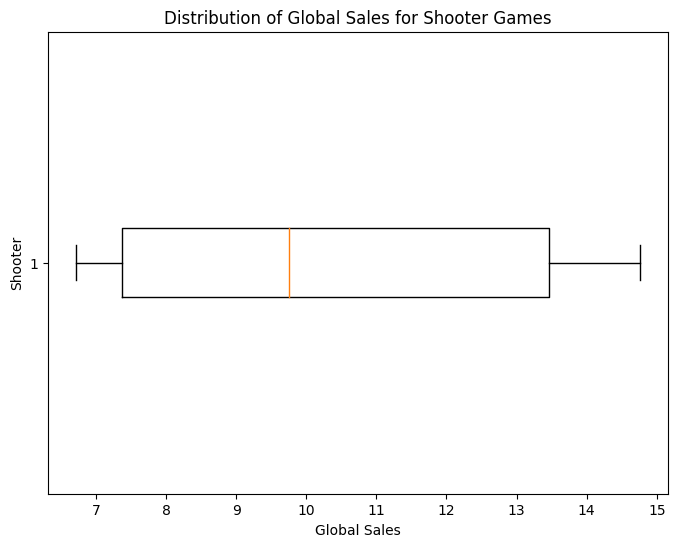

In [126]:
shooter_sales = vgs[vgs['Genre'] == 'Shooter']['Global_Sales']
plt.figure(figsize=(8, 6))
plt.boxplot(shooter_sales, vert=False)
plt.title('Distribution of Global Sales for Shooter Games')
plt.xlabel('Global Sales')
plt.ylabel('Shooter')
plt.show()